In [2]:

from GlucoCheck.glucoCheck import glucoCheckOps
import pandas as pd
import math

glucoCheckObject = glucoCheckOps()


Matplotlib is building the font cache; this may take a moment.
Using TensorFlow backend.


In [3]:
data = glucoCheckObject.hallData
data['Display Time'] = pd.to_datetime(data['Display Time'])
# data = data[data['subjectId']=='1636-70-1008']
data = data.reset_index(drop=True)
data.head()

,subjectId,Display Time,GlucoseValue
0,1636-69-001,2014-02-03 03:42:00,93
1,1636-69-001,2014-02-03 03:47:00,93
2,1636-69-001,2014-02-03 03:52:00,93
3,1636-69-001,2014-02-03 03:57:00,95
4,1636-69-001,2014-02-03 04:02:00,96


In [4]:
gap_counts = pd.DataFrame()
gap_counts['Subject ID'] = ""
# gap_counts

In [5]:
for subjectId, df in data.groupby('subjectId'):
    df['time_gap'] = df['Display Time'] - df['Display Time'].shift(1)
    df['gaps'] = (df['time_gap'].dt.total_seconds() / (5*60))
    xx = pd.DataFrame()
    xx = df.groupby(['gaps']).count()
    xx = xx.reset_index()
    xx = xx[xx['gaps']>1]
    xx['gaps'] = xx['gaps'].astype(int)
    xx = xx.drop(['Display Time','GlucoseValue','time_gap'], axis=1)
    xx.rename(columns = {'subjectId':'count'}, inplace = True)
    xx = xx.transpose()
    xx = xx.reset_index(drop=True)
    new_header = xx.iloc[0] #grab the first row for the header
    xx = xx[1:] #take the data less the header row
    xx.columns = new_header #set the header row as the df header
    xx = xx.groupby(level=0, axis=1).sum()
    xx['Subject ID'] =  str(subjectId)
#     print(subjectId)
    gap_counts = pd.concat([gap_counts,xx], axis=0, ignore_index=True)

gap_counts = gap_counts.set_index(['Subject ID'], drop=True)   
cols = gap_counts.columns.tolist()
cols.sort()
gap_counts = gap_counts.ix[:, cols]


In [11]:
gap_counts = gap_counts.fillna(0)
gap_counts

,1,2,3,4,8,9,15,16,17,18,...,1478,4099,4201,4488,19733,23586,48422,49782,84134,120016
Subject ID,,,,,,,,,,,,,,,,,,,,,
1636-69-001,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1636-69-026,2.0,28.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1636-69-028,3.0,15.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1636-69-032,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1636-69-035,1.0,26.0,9.0,3.0,1.0,0.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1636-69-048,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1636-69-053,4.0,21.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1636-69-060,0.0,24.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1636-69-064,0.0,19.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
gap_counts.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'}) 

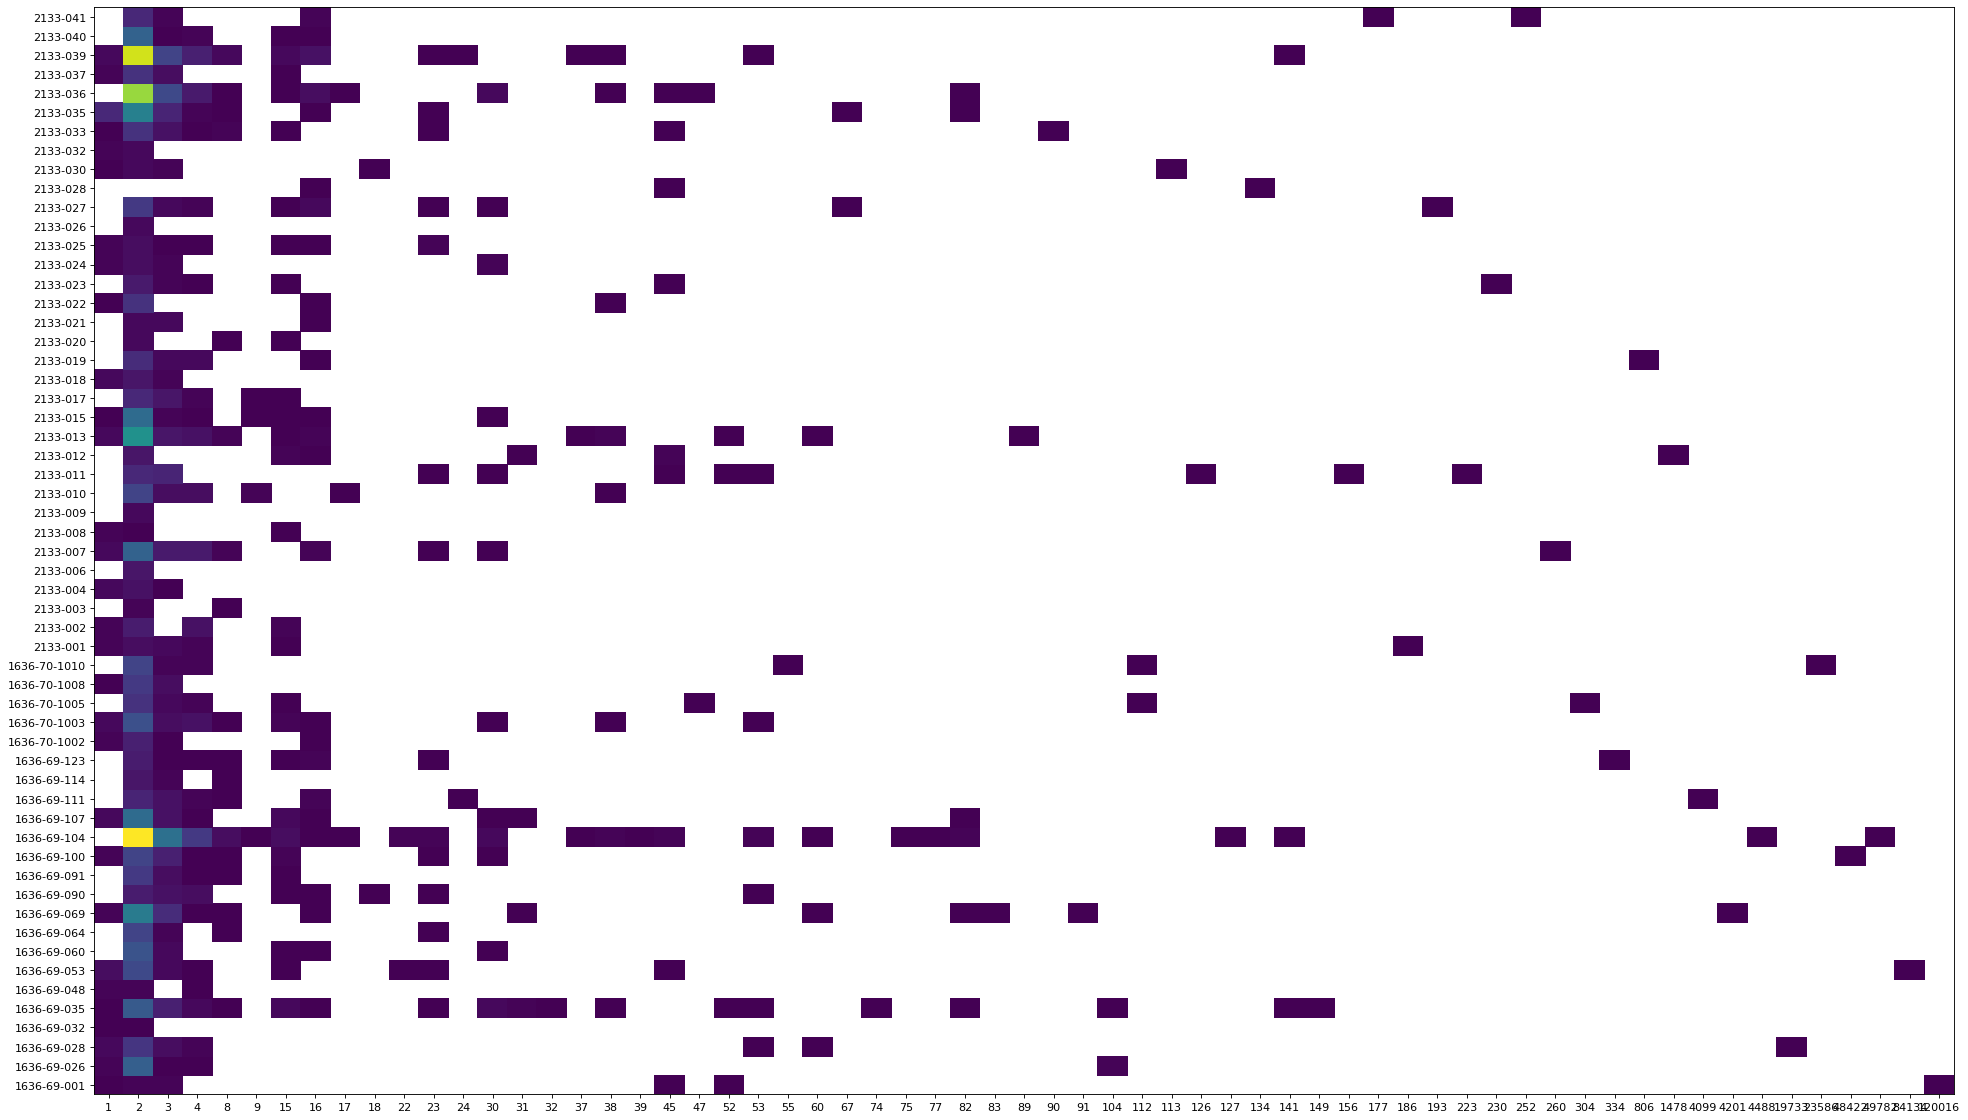

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(num=None, figsize=(30, 18), dpi=80, facecolor='w', edgecolor='k')
       
plt.pcolor(gap_counts)
plt.yticks(np.arange(0.5, len(gap_counts.index), 1), gap_counts.index)
plt.xticks(np.arange(0.5, len(gap_counts.columns), 1), gap_counts.columns)
plt.show()

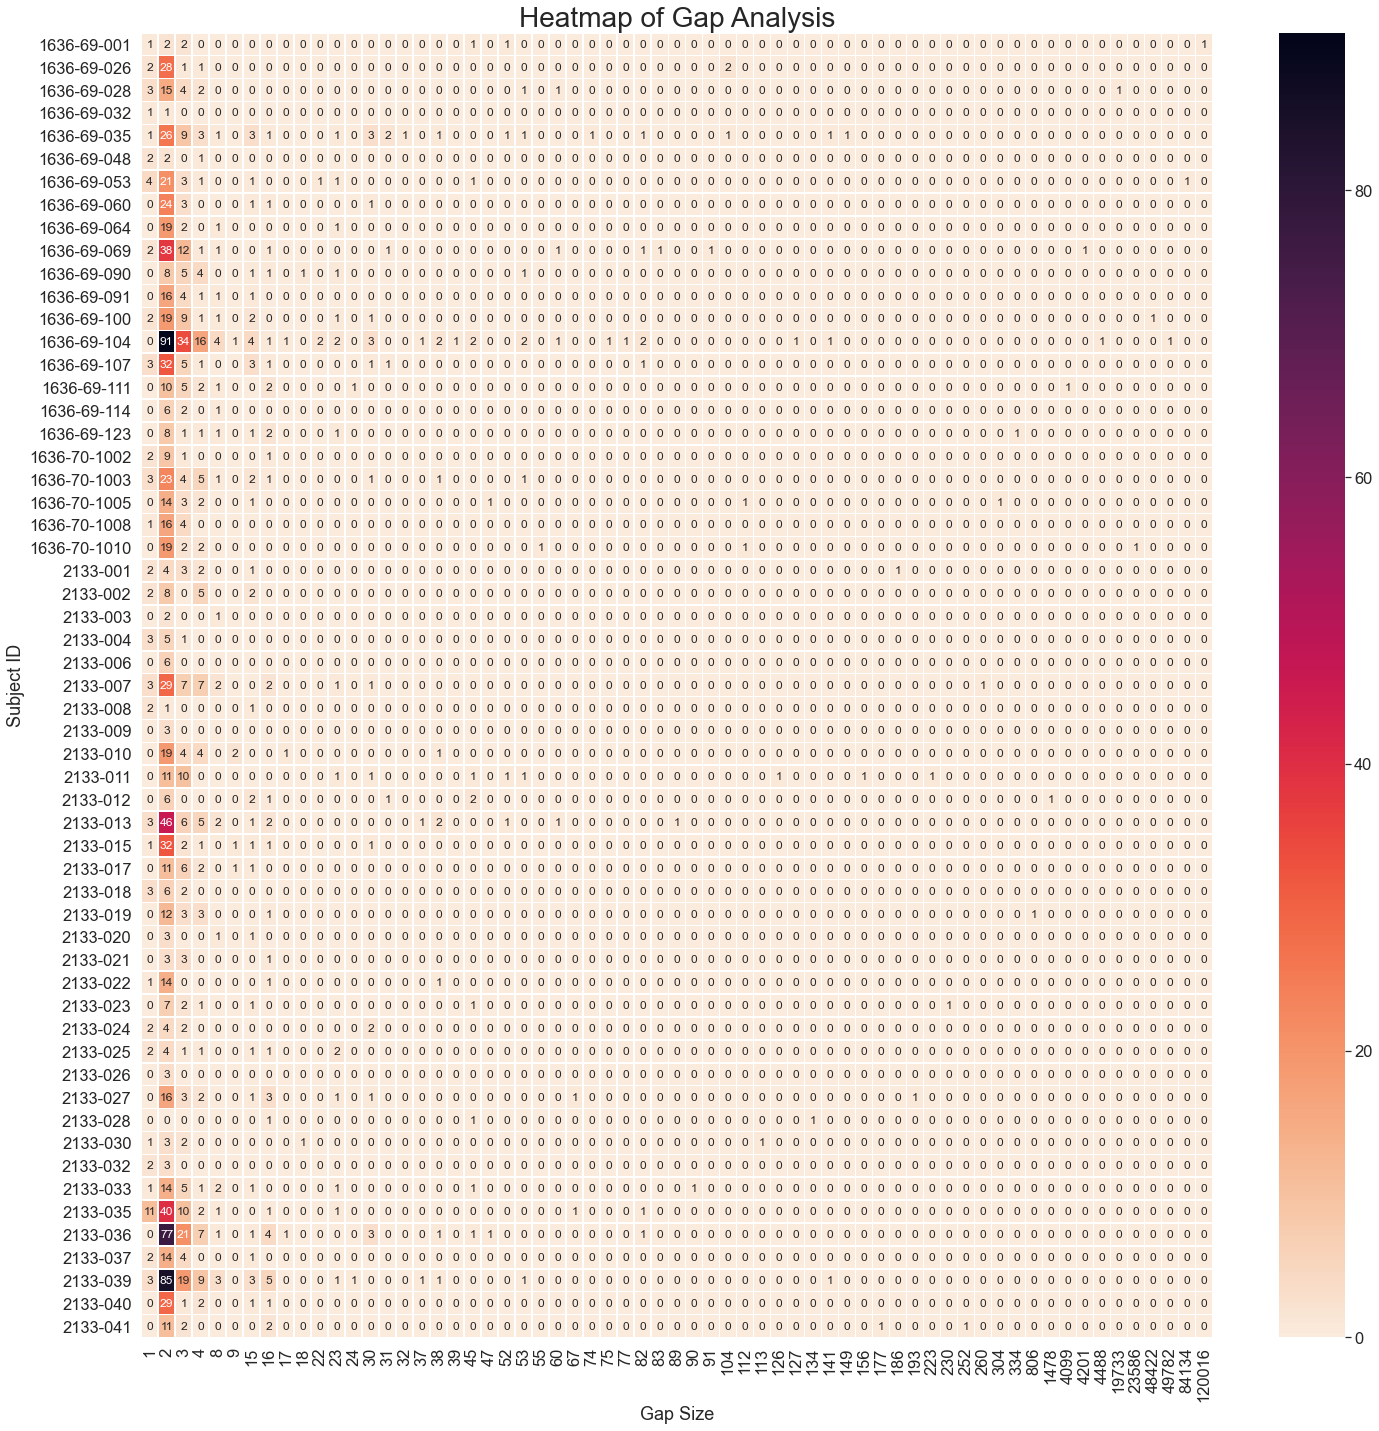

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt # for data visualization

p = sns.cm.rocket_r

sns.set(font_scale=1.5)

f, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(gap_counts, annot=True, linewidths=0.5, cmap=p, ax=ax, annot_kws={"fontsize":12})

plt.title('Heatmap of Gap Analysis', fontsize = 28) # title with fontsize 20
plt.xlabel('Gap Size', fontsize = 18) # x-axis label with fontsize 15
plt.ylabel('Subject ID', fontsize = 18) # y-axis label with fontsize 15

f.savefig('hmap.png')

plt.show()
